# Подготовка среды и датасетов

In [1]:
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
plt.rcParams['figure.figsize'] = 12, 8

In [39]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

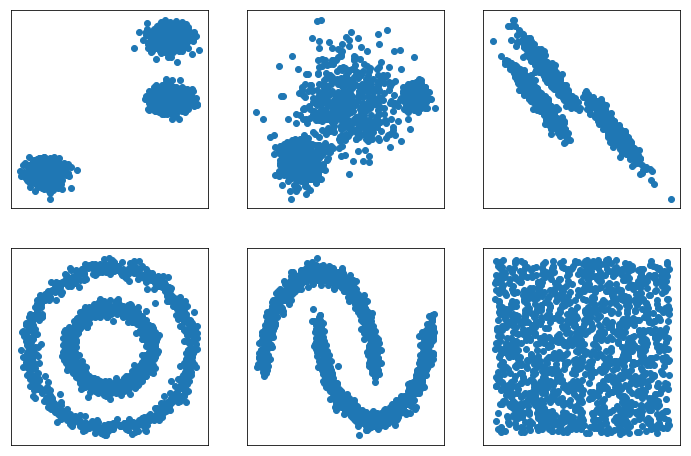

In [4]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:, 0], X[:, 1])

       
    

# KMeans

Интерактивная визуализация работы KMeans – https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Для примера из видео: **Random** $\rightarrow$ **Packed Circles**

![KMeans](https://www.jeremyjordan.me/content/images/2016/12/kmeans.gif "KMeans")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [5]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=8, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 max_iter=300
                )

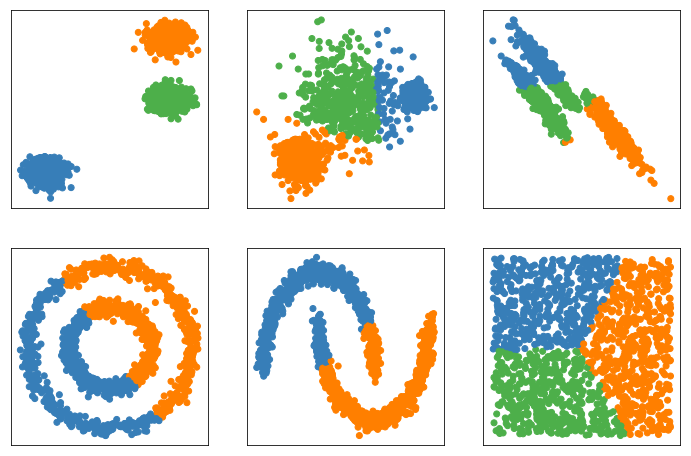

In [6]:
# создаём массив пар – датасета и соответствующих для него параметров алгоритма
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    k_means = KMeans(n_clusters=k_means_params['n_clusters'])
    
    k_means.fit(X)
    y_pred = k_means.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

Задание 4.5.2 
 
Для обучения модели K-means необходимо вызвать метод fit, передав входным параметром признаки объектов датасета.
Обучите модель K-means с параметрами n_clusters=3 и random_state=42 на признаках исходного датасета.
Какие центроиды будут у получившихся кластеров? Введите ответ в виде массива. Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round.

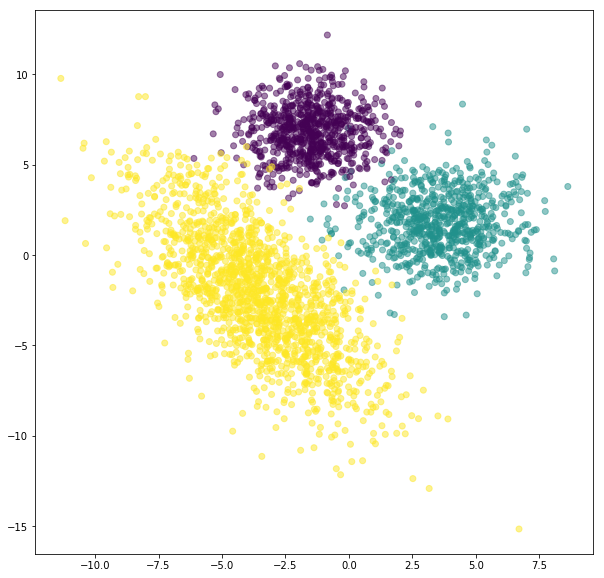

In [53]:
# создаём массив для задачи (взято из теоретической части подготовки к задаче)
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),    
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [54]:
unique, counts = np.unique(y, return_counts=True)  #Посмотрим распределение классов в датасете:
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

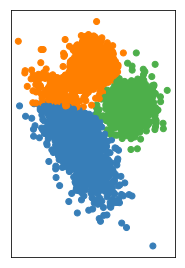

In [55]:
k_means = KMeans(n_clusters=3, random_state=42)  #выполним задание
   
k_means.fit(X)
y_pred = k_means.labels_.astype(np.int)

plt.subplot(f'23{i}')
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

In [56]:
k_means.cluster_centers_

array([[-3.18996384, -2.90484307],
       [-2.38363475,  6.23391526],
       [ 3.6296089 ,  1.74479425]])

In [57]:
print(np.round(k_means.cluster_centers_).astype(np.int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


Ответ: ([[-3, -3], [-2, 6], [ 4, 2]])

Задание 4.5.3 

Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2.

Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром return_counts=True:

In [10]:
#import numpy as np
#a = [0, 0, 0, 1, 1, 2]
#_, counts = np.unique(a, return_counts=True)
#for count in counts:
#    print(count, end=' ')

Для визуализации получившегося датасета можно использовать следующий код:

In [11]:
#k_means_pred = k_means.labels_
#plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
#plt.show()

In [65]:
_, counts = np.unique(k_means.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1320 938 742 

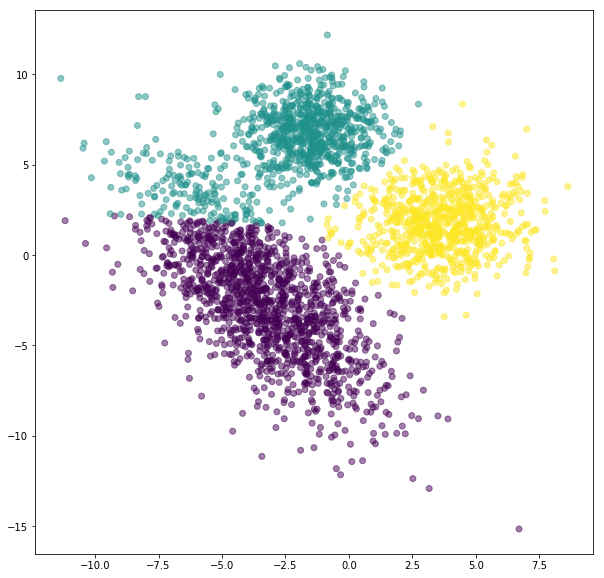

In [59]:
k_means_pred = k_means.labels_
plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

# EM-алгоритм

![EM-алгоритм](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif "EM-алгоритм")


Документация: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

In [66]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=1, 
                        max_iter=100,
                        init_params='kmeans' # 'kmeans’, ‘random’
                       )

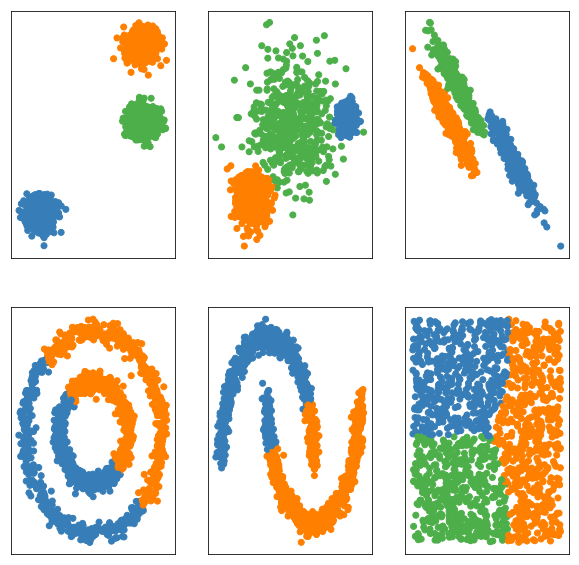

In [67]:
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, em_gm_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    em_gm = GaussianMixture(n_components=em_gm_params['n_clusters'])
    
    em_gm.fit(X)
    y_pred = em_gm.predict(X)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

Задание 4.6.2 
 
Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета.
Какие средние значения будут у получившихся распределений кластеров? Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:
astype(np.int) конвертирует элементы массива в целые числа. 

In [69]:
#import numpy as np
#a = [0.4, 0.6, 1.7]
#print(np.round(a).astype(np.int))

#[0 1 2]

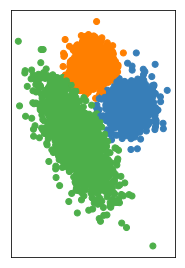

In [70]:
# создаём массив для задачи (взято из теоретической части подготовки к задаче)
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),    
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))


em_gm = GaussianMixture(n_components=3,random_state=42 )
    
em_gm.fit(X)
y_pred = em_gm.predict(X)

plt.subplot(f'23{i}')
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                               int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

In [75]:
means=em_gm.means_
print(np.round(means).astype(np.int))

[[ 4  2]
 [-2  7]
 [-4 -2]]


Задание 4.6.3 
 
Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2.
Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром return_counts=True:

In [77]:
_, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

744 763 1493 

# Агломеративная кластеризация

![AG](https://media.giphy.com/media/pSNCWCEAsgrAs/giphy.gif "Агломеративная кластеризация")


Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

In [78]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean', # “euclidean”, “l1”, “l2”, “manhattan”, 
                                                   # “cosine”, or “precomputed”
                             linkage='ward', # “ward”, “complete”, “average”, “single”
                            )

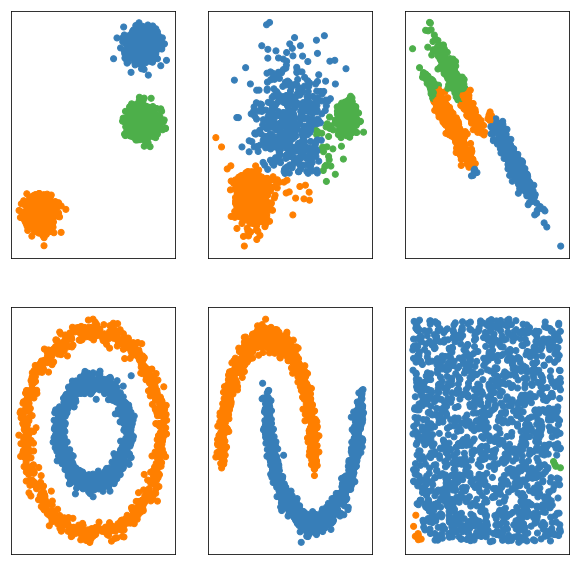

In [79]:
import warnings

from sklearn.neighbors import kneighbors_graph

datasets_params_list = [
    (blobs, {'n_clusters': 3, 'n_neighbors': 10}),
    (varied, {'n_clusters': 3, 'n_neighbors': 2}),
    (aniso, {'n_clusters': 3, 'n_neighbors': 2}),
    (noisy_circles, {'n_clusters': 2, 'n_neighbors': 10}),
    (noisy_moons, {'n_clusters': 2, 'n_neighbors': 10}),
    (no_structure, {'n_clusters': 3, 'n_neighbors': 10})]

for i, (X, ac_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    
    # строим матрицу смежности
    connectivity = kneighbors_graph(X, 
                                    n_neighbors=ac_params['n_neighbors'], 
                                    include_self=False)
    # делаем матрицу смежности симметричной
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    ac = AgglomerativeClustering(n_clusters=ac_params['n_clusters'], 
                                 linkage='average',
                                 connectivity=connectivity)
    
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        ac.fit(X)
    y_pred = ac.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

Задание 4.7.4 
  
Обучите модель AgglomerativeClustering с параметром n_clusters=3 и составленной матрицей смежности на признаках исходного датасета. Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2.

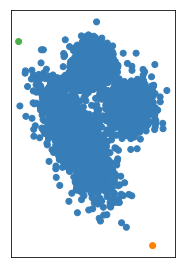

In [109]:
# создаём массив для задачи (взято из теоретической части подготовки к задачам)
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),    
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

X = StandardScaler().fit_transform(X)

# строим матрицу смежности
connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)

# делаем матрицу смежности симметричной
connectivity = 0.5 * (connectivity + connectivity.T)
    
ac = AgglomerativeClustering(n_clusters=3, linkage='average', connectivity=connectivity)
    
with warnings.catch_warnings():
    warnings.filterwarnings(
        "ignore",
        message="the number of connected components of the " +
        "connectivity matrix is [0-9]{1,2}" +
        " > 1. Completing it to avoid stopping the tree early.",
        category=UserWarning)
    ac.fit(X)
y_pred = ac.labels_.astype(np.int)

plt.subplot(f'23{i}')
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

In [110]:
_, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count, end=' ')   #должно получиться: 1486 746 768

2998 1 1 

# DBSCAN

Интерактивная визуализация работы DBSCAN – https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

Для примера из видео: **Pimpled Smiley**

![DBSCAN](https://media0.giphy.com/media/lCL2GQewp7fkk/giphy.gif "DBSCAN")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [111]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,
                min_samples=5)

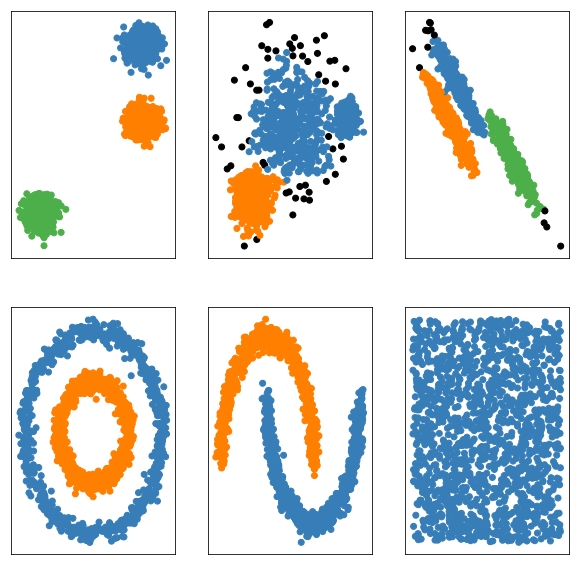

In [112]:
datasets_params_list = [
    (blobs, {'eps': 0.3}),
    (varied, {'eps': 0.18}),
    (aniso, {'eps': 0.184}),
    (noisy_circles, {'eps': 0.3}),
    (noisy_moons, {'eps': 0.3}),
    (no_structure, {'eps': 0.3})]

for i, (X, dbscan_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    dbscan = DBSCAN(eps=dbscan_params['eps'])
    
    dbscan.fit(X)
    y_pred = dbscan.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # чёрным цветом отметим выбросы
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

Задание 4.8.2 
  
Обучите модель DBSCAN с параметрами eps=0.9 и min_samples=35 на признаках объектов исходного датасета. Выведите число получившихся кластеров.
Обратите внимание, что DBSCAN определяет выбросы, относя их к кластеру -1. 
Кластер выбросов учитывать в ответе не нужно.

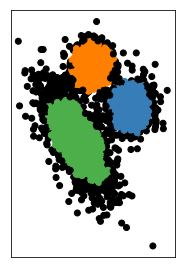

In [117]:
# создаём массив для задачи (взято из теоретической части подготовки к задачам)
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),    
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])

transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

#X = StandardScaler().fit_transform(X) #здесь не нужно, судя по принятым результатам

dbscan = DBSCAN(eps=0.8, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(np.int)

plt.subplot(f'23{i}')
plt.xticks([]); plt.yticks([])
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y_pred) + 1))))
# чёрным цветом отметим выбросы
colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

In [120]:
_, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count, end=' ') 

583 603 681 1133 

Задание 4.11.2 
 
Сравните результаты кластеризации четырёх рассмотренных алгоритмов на исходном датасете при помощи коэффициента силуэта, инициализируйте алгоритмы со следующими параметрами:
K-means — n_clusters=3, random_state=42
EM-алгоритм (GaussianMixture) — n_components=3, random_state=42
Агломеративная кластеризация – n_clusters=3
DBSCAN – eps=0.9, min_samples=35
Укажите максимальное значение коэффициента силуэта, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

In [141]:
from sklearn.metrics import silhouette_score

In [142]:
# создаём массив для задачи (взято из теоретической части подготовки к задаче)
n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),    
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))


In [152]:
#EM
em_gm = GaussianMixture(n_components=3,random_state=42 )
em_gm.fit(X)
y_pred_em=em_gm.predict(X)
# теперь посчитаем коэффициент силуэта
silhouette_score(X, y_pred_em, metric='euclidean') 

0.49893287606943293

In [158]:
#K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
silhouette_score(X, kmeans_pred, metric='euclidean')

0.5131209788437305

In [168]:
#Агломеративная
ac = AgglomerativeClustering(n_clusters=3, linkage='average')
ac.fit(X)
y_pred_ac = ac.labels_.astype(np.int)
# теперь посчитаем коэффициент силуэта
silhouette_score(X, y_pred_ac, metric='euclidean')

0.37652761742046825

In [139]:
#DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred_db = dbscan.labels_.astype(np.int)
# теперь посчитаем коэффициент силуэта
silhouette_score(X, y_pred_db, metric='euclidean')

0.4454335539277996

Задание 4.12.2 

Сравните результаты кластеризации алгоритмов K-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи однородности, инициализируйте алгоритмы со следующими параметрами:
K-means – n_clusters=3, random_state=42
GaussianMixture – n_components=3, random_state=42
AgglomerativeClustering – n_clusters=3
DBSCAN – eps=0.9, min_samples=35
В качестве ответа укажите максимальное значение однородности, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

In [170]:
from sklearn.metrics.cluster import homogeneity_score
#EM
homogeneity_score(labels_true=y, labels_pred=y_pred_em)

0.9339791347507893

In [171]:
#K-Means
homogeneity_score(labels_true=y, labels_pred=kmeans_pred)

0.807281738408743

In [172]:
#Агломеративная
homogeneity_score(labels_true=y, labels_pred=y_pred_ac)

0.46654785588292963

In [173]:
#DBSCAN
homogeneity_score(labels_true=y, labels_pred=y_pred_db)

0.8689356473867522

Задание 4.13.2 

Сравните результаты кластеризации алгоритмов K-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи полноты, инициализируйте алгоритмы со следующими параметрами:
K-means – n_clusters=3, random_state=42
GaussianMixture – n_components=3, random_state=42
AgglomerativeClustering – n_clusters=3
DBSCAN – eps=0.9, min_samples=35
В качестве ответа укажите максимальное значение полноты, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

In [174]:
from sklearn.metrics.cluster import completeness_score

In [175]:
#EM
completeness_score(labels_true=y, labels_pred=y_pred_em)

0.9325740421656737

In [176]:
#K-Means
completeness_score(labels_true=y, labels_pred=kmeans_pred)

0.7842373379017128

In [177]:
#Агломеративная
completeness_score(labels_true=y, labels_pred=y_pred_ac)

0.638545170273603

In [178]:
#DBSCAN
completeness_score(labels_true=y, labels_pred=y_pred_db)

0.6965554058940557

Задание 4.14.1 
 
Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета. Посчитайте v-меру для получившейся кластеризации. Ответ округлите до сотых и запишите с точкой.

In [179]:
from sklearn.metrics.cluster import v_measure_score

In [180]:
v_measure_score(labels_true=y, labels_pred=y_pred_em)

0.9332760595996924

Задание 4.14.2 

Сравним модификации K-means с использованием случайной инициализации центроид и с использованием алгоритма K-means++ для инициализации центроид.
Для этого обучим на исходном датасете 2 модели K-means со следующими параметрами:

n_clusters=3, init='k-means++', n_init=1, random_state=42

n_clusters=3, init='random', n_init=1, random_state=42

В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

In [181]:
#K-Means1
kmeans1 = KMeans(n_clusters=3, init='k-means++', n_init=1, random_state=42)
kmeans1.fit(X)
kmeans_pred1 = kmeans1.labels_

# теперь посчитаем v-measure
v_measure_score(labels_true=y, labels_pred=kmeans_pred1)

0.7911556191133551

In [182]:
#K-Means2
kmeans2 = KMeans(n_clusters=3, init='random', n_init=1, random_state=42)
kmeans2.fit(X)
kmeans_pred2 = kmeans1.labels_

# теперь посчитаем v-mesure
v_measure_score(labels_true=y, labels_pred=kmeans_pred2)

0.7911556191133551

Задание 4.14.3 

Теперь сравним K-means с ещё одной модификацией – K-means mini batch. 
Обучите на исходном датасете две модели:

K-means с параметрами n_clusters=3, n_init=1, random_state=42

MiniBatchKMeans с параметрами n_clusters=3, n_init=1, random_state=42

В качестве ответа введите максимальное значение v-меры, полученное при помощи данных моделей.
Ответ округлите до сотых и запишите с точкой.

In [183]:
from sklearn.cluster import MiniBatchKMeans

In [185]:
kmeans_mini_batch1 = MiniBatchKMeans(n_clusters=3, n_init=1, random_state=42)
kmeans_mini_batch1.fit(X)
kmeans_mini_batch_pred1 = kmeans_mini_batch1.labels_

# теперь посчитаем v-measure
v_measure_score(labels_true=y, labels_pred=kmeans_mini_batch_pred1)

0.7802036540872134

In [187]:
#K-Means3
kmeans3 = KMeans(n_clusters=3, n_init=1, random_state=42)
kmeans3.fit(X)
kmeans_pred3 = kmeans3.labels_

# теперь посчитаем v-measure
v_measure_score(labels_true=y, labels_pred=kmeans_pred3)

0.7911556191133551

Задание 4.14.4 

Рассмотрим агломеративную кластеризацию. Сравним, как влияет на качество кластеризации разный тип расстояния между кластерами.
Обучите на исходном датасете четыре модели AgglomerativeClustering с параметром n_clusters=3, меняя параметр linkage.
В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей. Ответ округлите до десятых и запишите с точкой.

In [188]:
ac1 = AgglomerativeClustering(n_clusters=3, linkage='ward')
ac1.fit(X)
y_pred_ac1 = ac1.labels_.astype(np.int)
# теперь посчитаем v-measure
v_measure_score(labels_true=y, labels_pred=y_pred_ac1)

0.703747024360433

In [189]:
ac2 = AgglomerativeClustering(n_clusters=3, linkage='complete')
ac2.fit(X)
y_pred_ac2 = ac2.labels_.astype(np.int)
# теперь посчитаем v-measure
v_measure_score(labels_true=y, labels_pred=y_pred_ac2)

0.4105143541946565

In [190]:
ac3 = AgglomerativeClustering(n_clusters=3, linkage='average')
ac3.fit(X)
y_pred_ac3 = ac3.labels_.astype(np.int)
# теперь посчитаем v-measure
v_measure_score(labels_true=y, labels_pred=y_pred_ac3)

0.5391616325942709

In [191]:
ac4 = AgglomerativeClustering(n_clusters=3, linkage='single')
ac4.fit(X)
y_pred_ac4 = ac4.labels_.astype(np.int)
# теперь посчитаем v-measure
v_measure_score(labels_true=y, labels_pred=y_pred_ac4)

0.0008842106330108959

Задание 4.14.5 
 
Сравним, как влияет предварительный расчёт матрицы смежности на качество агломеративной кластеризации.
Обучите на исходном датасете две модели AgglomerativeClustering:

с параметром n_clusters=3

с параметром n_clusters=3 и предварительно посчитанной матрицей смежности для объектов датасета


Построить матрицу смежности можно с помощью кода:

In [192]:
#from sklearn.neighbors import kneighbors_graph

#connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
#connectivity = 0.5 * (connectivity + connectivity.T)

В качестве ответа введите максимальное значение v-меры, полученное при помощи данных моделей.
Ответ округлите до десятых и запишите с точкой.

In [193]:
ac5 = AgglomerativeClustering(n_clusters=3)
ac5.fit(X)
y_pred_ac5 = ac5.labels_.astype(np.int)
# теперь посчитаем v-measure
v_measure_score(labels_true=y, labels_pred=y_pred_ac5)

0.703747024360433

In [194]:
ac6 = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)
ac6.fit(X)
y_pred_ac6 = ac6.labels_.astype(np.int)
# теперь посчитаем v-measure
v_measure_score(labels_true=y, labels_pred=y_pred_ac6)

0.9057691302928179

Задание 4.14.6 
 
Алгоритм DBSCAN очень требователен к параметрам: небольшое изменение в параметре eps или max_samples может изменить результат и качество кластеризации.
Обучите на исходном датасете две модели DBSCAN:

с параметрами eps=0.9, min_samples=35

с параметрами eps=0.8, min_samples=35

В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей.
Ответ округлите до сотых и запишите с точкой.

In [195]:
dbscan1 = DBSCAN(eps=0.9, min_samples=35)
dbscan1.fit(X)
y_pred_db1 = dbscan1.labels_.astype(np.int)

# теперь посчитаем v-measure
v_measure_score(labels_true=y, labels_pred=y_pred_db1)

0.7732549110297919

In [196]:
dbscan2 = DBSCAN(eps=0.8, min_samples=35)
dbscan2.fit(X)
y_pred_db2 = dbscan2.labels_.astype(np.int)

# теперь посчитаем v-measure
v_measure_score(labels_true=y, labels_pred=y_pred_db2)

0.7063100442576922

Задание 4.14.7 
 
Особенностью алгоритма DBSCAN является то, что помимо кластеризации этот алгоритм определяет выбросы в выборке.
Посмотрим на качество кластеризации без учёта таких объектов.
Обучите на исходном датасете модель DBSCAN с параметрами eps=0.9, min_samples=35.
Посчитайте значение v-меры только для основных и граничных объектов выборки, то есть для объектов, что не являются выбросами. Ответ округлите до сотых и запишите с точкой.

In [248]:
v_measure_score(labels_true=???, labels_pred=???)  #I don't know

0.6095862996515569

Задание 4.14.8 
 
В курсе мы рассмотрели две метода нормализации данных:
MinMax нормализация — приведение данных к масштабу между 0 и 1.
Стандартная нормализация — данные имеют среднее 0 и стандартное отклонение 1.
Проверим, влияет ли предобработка данных на результат кластеризации. Обучите две модели AgglomerativeClustering с параметрами n_clusters=3:

на признаках исходного датасета,

предварительно трансформируйте признаки при помощи стандартной нормализации.

Посчитайте v-меру для получившихся результатов, в качестве ответа введите наибольшее значение. 
Ответ округлите до сотых и запишите с точкой.

In [205]:
ac7 = AgglomerativeClustering(n_clusters=3)
ac7.fit(X)
y_pred_ac7 = ac7.labels_.astype(np.int)
# теперь посчитаем v-measure
v_measure_score(labels_true=y, labels_pred=y_pred_ac7)

0.703747024360433

In [206]:
Xst = StandardScaler().fit_transform(X)
ac8 = AgglomerativeClustering(n_clusters=3)
ac8.fit(Xst)
y_pred_ac8 = ac8.labels_.astype(np.int)
# теперь посчитаем v-measure
v_measure_score(labels_true=y, labels_pred=y_pred_ac8)

0.9079037199053294

Задание 4.14.9 
 
Обучите две модели AgglomerativeClustering с параметрами n_clusters=3:

на признаках исходного датасета,

предварительно трансформируйте признаки при помощи MinMax нормализации.

Посчитайте v-меру для получившихся результатов, в качестве ответа введите наибольшее значение. Ответ округлите до сотых и запишите с точкой.

In [210]:
from sklearn.preprocessing import MinMaxScaler

In [211]:
Xmm = MinMaxScaler().fit_transform(X)
ac9 = AgglomerativeClustering(n_clusters=3)
ac9.fit(Xmm)
y_pred_ac9 = ac9.labels_.astype(np.int)
# теперь посчитаем v-measure
v_measure_score(labels_true=y, labels_pred=y_pred_ac9)

0.8929241488344335